In [1]:
import numpy as np
import matplotlib
import matplotlib.patches as patches
import matplotlib.pyplot as plt

import sys
sys.path += ['Package/']  ### Specify the directory where the Package is
from functions_for_DDCSBM import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
T_v = np.arange(2,15) # vector containing different values of T 
n_step = 40 # number of points in which \alpha_c(T,\eta) is evaluated at fixed T
c  = 10 # average degree
phi = 2.5 # E[\theta_i**2]
eta_v = np.linspace(0,1,n_step) # vector with different values of \eta
Alpha_v = np.zeros((len(T_v),n_step)) # array containing the values of \alpha_c(T,\eta)

for i in range(len(T_v)):
    for j in range(n_step):
            Alpha_v[i][j] = find_transition(T_v[i],eta_v[j])

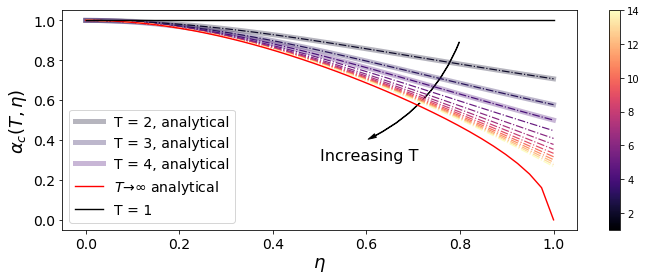

In [3]:
fig = plt.figure(figsize = (10,4))

c_m = matplotlib.cm.magma
norm = matplotlib.colors.Normalize(vmin=1,vmax=max(T_v))


# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm = norm)
s_m.set_array([])

linestyle = ['-.' for i in range(len(T_v))]
# linestyle[:3] = ['--' for i in range(3)]


plt.plot(eta_v,np.sqrt(1/(1+eta_v**2)), color = s_m.to_rgba(2), alpha = 0.3, linewidth = 5, label = 'T = 2, analytical', linestyle = '-')

val = np.zeros(len(eta_v))
for i in range(len(eta_v)):
    b = eta_v[i]**2
    val[i] = np.sqrt(2/(2+b**2+np.sqrt(b**4+8*b**2)))
plt.plot(eta_v,val, color = s_m.to_rgba(3), linewidth = 5, alpha = 0.3,label = 'T = 3, analytical', linestyle = '-')

val = np.linspace(0,1,len(eta_v))
for i in range(len(eta_v)):
    b = eta_v[i]**2
    x = 2+b+b**3
    y = 1+b-b**2-b**3
    val[i] = np.sqrt(2/(x+np.sqrt(x**2-4*y)))
plt.plot(eta_v,val, color = s_m.to_rgba(4), linewidth = 5, alpha = 0.3,label = 'T = 4, analytical', linestyle = '-')

for i in range(len(T_v)):
    plt.plot(eta_v,Alpha_v[i], color = s_m.to_rgba(T_v[i]), linestyle = linestyle[i], linewidth = 1.2)
    
plt.colorbar(s_m)
plt.plot(eta_v,np.sqrt((1-eta_v**2)/(1+eta_v**2)), color = 'red', alpha = 1,linewidth = 1.4, linestyle = '-', label = r'$T \to \infty$ analytical')
plt.xlabel(r'$\eta$', fontsize = 18)
plt.ylabel(r'$\alpha_c(T,\eta)$', fontsize = 18)
plt.plot(eta_v, np.ones(len(eta_v)), color = 'k', linestyle = '-', label = 'T = 1', linewidth = 1.4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)





plt.legend(fontsize = 14)

style="Simple,tail_width=0.5,head_width=4,head_length=8"
kw = dict(arrowstyle=style, color="k")
a = patches.FancyArrowPatch((0.8,0.9), (0.6,0.4),connectionstyle="arc3,rad=-.2", **kw)
plt.gca().add_patch(a)
plt.text(0.5,0.3, 'Increasing T', fontsize = 16)

plt.tight_layout()


plt.show();